In [142]:
import numpy as np
import random
from pymoo.core.problem import Problem
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from src.multi_evolutive import RealMultiEvolutive
from src.evaluation import MultiObjectiveEvaluation

In [143]:
def plot_pareto_front(pareto_front, obtained_results, algorithm_name=str, problem_name=str):
    fig, axs = plt.subplots(1, 1)
    axs.set_ylim(-0.25, 1.25)
    axs.scatter(pareto_front[:, 0], pareto_front[:, 1], label= problem_name + ' Pareto')
    axs.scatter(obtained_results[:, 0], obtained_results[:, 1], label= algorithm_name + ' Obtained Pareto')
    plt.legend()
    plt.show()

In [144]:
def plot_pareto_front_3d(pareto_front, obtained_results, algorithm_name=str, problem_name=str):
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(x=pareto_front[:, 0], y=pareto_front[:, 1], z=[0]*pareto_front.shape[0], mode='markers', name=problem_name + ' Pareto'))
    fig.add_trace(go.Scatter3d(x=obtained_results[:, 0], y=obtained_results[:, 1], z=[0]*obtained_results.shape[0], mode='markers', name=algorithm_name + ' Obtained Pareto'))

    fig.show()

In [186]:
def plot_multiple_pareto_fronts(fronts_dict, title="Pareto Fronts Comparison", cmap='Dark2'):
    """
    Plot multiple Pareto fronts using a predefined colormap and systematic markers.
    
    Parameters:
    -----------
    fronts_dict : dict
        Dictionary with format {front_name: points_array}
        where points_array is a numpy array of shape (n_points, 2)
    title : str, optional
        Title for the plot
    cmap : str, optional
        Name of the colormap to use
    """
    cmap = plt.get_cmap(cmap)
    
    plt.figure(figsize=(10, 6))
    
    n_fronts = len(fronts_dict)
    colors = [cmap(i / (n_fronts - 1) if n_fronts > 1 else 0) for i in range(n_fronts)]
    
    # Plot each front with a different color and marker
    for i, (front_name, points) in enumerate(fronts_dict.items()):
        plt.scatter(points[:, 0], 
                   points[:, 1],
                   c=[colors[i]], 
                   marker=i+1,  # Matplotlib will automatically cycle through marker styles
                   label=front_name,
                   alpha=0.7)
    
    plt.title(title)
    plt.xlabel("Objective 1")
    plt.ylabel("Objective 2")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Adjust layout to prevent legend cutoff
    plt.tight_layout()
    plt.show()

In [146]:
p_fronts = {}

### zdt1

Generation       50 | Population Elite Points:      374 | Zitlerd: 0.7476 | Spa: 0.0143 | Hrs: 0.8796 | Gdplus: 0.2103 | Igdplus: 0.1917 | Hv: 0.3857
Generation      100 | Population Elite Points:      766 | Zitlerd: 0.8928 | Spa: 0.0104 | Hrs: 0.8901 | Gdplus: 0.0253 | Igdplus: 0.0235 | Hv: 0.6268
Generation      150 | Population Elite Points:     1305 | Zitlerd: 0.9688 | Spa: 0.0070 | Hrs: 0.8976 | Gdplus: 0.0067 | Igdplus: 0.0059 | Hv: 0.6555
Generation      200 | Population Elite Points:     1841 | Zitlerd: 1.0516 | Spa: 0.0063 | Hrs: 0.8936 | Gdplus: 0.0034 | Igdplus: 0.0026 | Hv: 0.6618


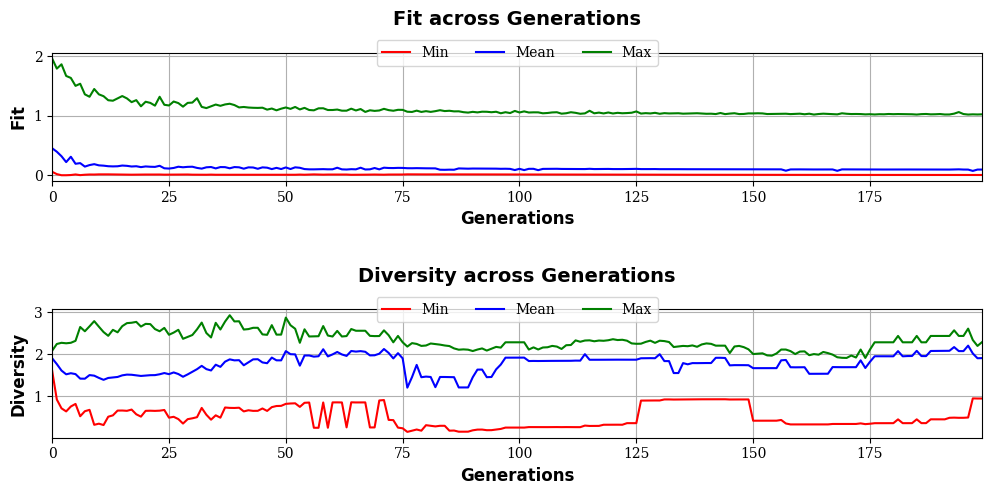

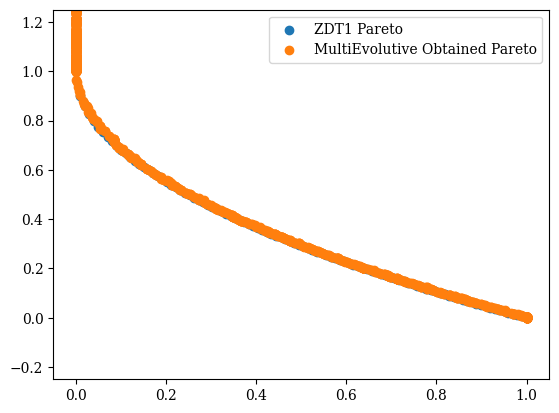

In [147]:
problem = get_problem("zdt1")
evaluation = MultiObjectiveEvaluation(
    evaluate=problem.evaluate,
    problem=problem,
    reference_point=(1., 1.),
    # limits=[[0, 1], [0, 1]]
)
evolutive = RealMultiEvolutive(
    n_individuals=50,
    value_range=[0, 1],
    maximize=[False, False],
    cromolength=30,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha"],
    front='front',
    penalization='crowding_norm',
    selection_pool_size=0.9,
    average_mutation_rate=1.25,
    mutation_eps=0.5,
    elitism=True,
    alpha=0.2,
    T_selection=6,
    evaluation_metrics=evaluation
)

results = evolutive.evolve(fit=problem.evaluate, n_generations=200, trace=50, obtain_metrics=True)
evolutive.plot_evolution_metrics(results["evolution_metrics"])
plt.show()

fit_scores = np.array([problem.evaluate(p) for p in results["best"]])
plot_pareto_front(problem.pareto_front(), fit_scores, 'MultiEvolutive', 'ZDT1')
# plot(problem.evaluate(results["best"]))


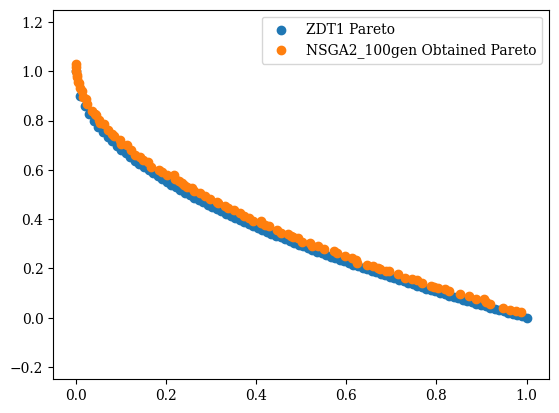

In [148]:
algorithm = NSGA2(pop_size=100)
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False)

pareto_front = problem.pareto_front()
obtained_results = res.F

p_fronts["RealMultiEvolutive ZDT1"] = fit_scores

plot_pareto_front(pareto_front, obtained_results, 'NSGA2_100gen', 'ZDT1')

In [149]:
plot_pareto_front_3d(pareto_front, obtained_results, 'NSGA2_100gen', 'ZDT1')

### zdt3

Generation       50 | Population Elite Points:      455 | Best Fit: 1.1157 | Mean Fit: 0.0146
Generation      100 | Population Elite Points:      942 | Best Fit: 1.0468 | Mean Fit: 0.0066
Generation      150 | Population Elite Points:     1352 | Best Fit: 1.0406 | Mean Fit: 0.0046
Generation      200 | Population Elite Points:     1768 | Best Fit: 1.0233 | Mean Fit: 0.0035


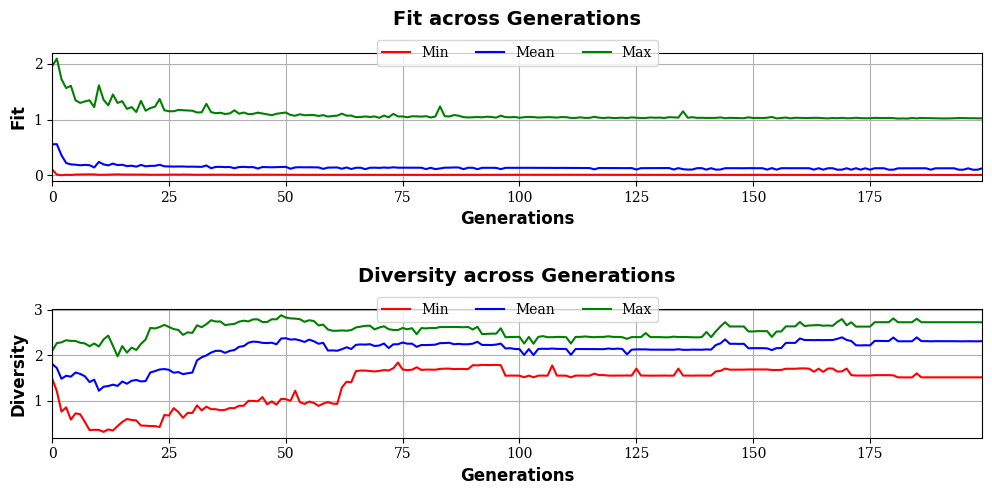

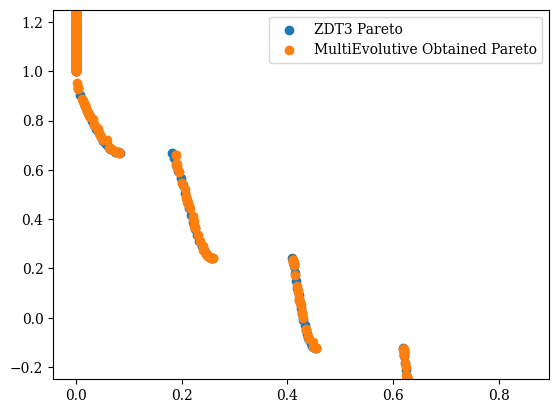

In [150]:
problem = get_problem("zdt3")
evolutive = RealMultiEvolutive(
    n_individuals=50,
    value_range=[0, 1],
    maximize=[False, False],
    cromolength=30,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha"],
    front='front',
    penalization='crowding_norm',
    selection_pool_size=0.8,
    average_mutation_rate=1.5,
    mutation_eps=0.5,
    elitism=True,
    alpha=0.6,
    T_selection=10
)

results = evolutive.evolve(fit=problem.evaluate, n_generations=200, trace=50, obtain_metrics=True)
evolutive.plot_evolution_metrics(results["evolution_metrics"])
plt.show()

fit_scores = np.array([problem.evaluate(p) for p in results["best"]])
plot_pareto_front(problem.pareto_front(), fit_scores, 'MultiEvolutive', 'ZDT3')


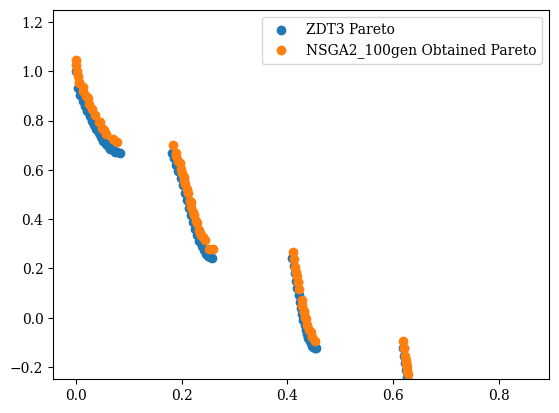

In [151]:
algorithm = NSGA2(pop_size=100)
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False)

pareto_front = problem.pareto_front()
obtained_results = res.F

p_fronts["RealMultiEvolutive ZDT3"] = fit_scores

plot_pareto_front(pareto_front, obtained_results, 'NSGA2_100gen', 'ZDT3')

In [152]:
plot_pareto_front_3d(pareto_front, obtained_results, 'NSGA2_100gen', 'ZDT3')

### mw7

In [153]:
def mw7(x):
    g = 1 + 9 * np.sum(x[1:]) / (len(x) - 1)
    f1 = x[0]
    f2 = g * (1 - (f1 / g)**0.5)
    c1 = np.sum(x) - 1.5
    c2 = 0.5 - np.sum(x[:-1])
    return [f1, f2], [c1, c2]

In [154]:
def penalized_mw7(x):
    """
    Wrapper function for MW7 that incorporates constraints using penalty method.
    Returns modified fitness values with penalties for constraint violations.
    """
    # Get original objectives and constraints
    [f1, f2], [c1, c2] = mw7(x)
    
    # Calculate constraint violations
    # c1: sum(x) - 1.5 <= 0
    # c2: 0.5 - sum(x[:-1]) <= 0

    scaled_c1 = c1 / 1.5  # Normalize c1 by its max value
    scaled_c2 = c2 / 0.5  # Normalize c2 by its max value

    violation1 = max(0, scaled_c1) # Only penalize if > 0
    violation2 = max(0, scaled_c2) # Only penalize if > 0
    
    # Penalty coefficient (you may need to tune this)
    penalty_coef = 10 * np.max([abs(f1), abs(f2)])
    penalty = penalty_coef * (violation1 + violation2)

    # Add penalties to objectives
    penalized_f1 = f1 + penalty
    penalized_f2 = f2 + penalty
    
    return np.array([penalized_f1, penalized_f2])

c:\Users\aleja\Desktop\MAADM\BIO\bioinspired-evo\src\utils.py:59: RuntimeWarning:

divide by zero encountered in divide

c:\Users\aleja\Desktop\MAADM\BIO\bioinspired-evo\src\utils.py:54: RuntimeWarning:

invalid value encountered in subtract



Generation       25 | Population Elite Points:       31 | Best Fit: 0.4776 | Mean Fit: 0.1562
Generation       50 | Population Elite Points:       33 | Best Fit: 0.3791 | Mean Fit: 0.1595
Generation       75 | Population Elite Points:       34 | Best Fit: 0.3518 | Mean Fit: 0.1575
Generation      100 | Population Elite Points:       35 | Best Fit: 0.3002 | Mean Fit: 0.1538
Generation      125 | Population Elite Points:       47 | Best Fit: 0.2186 | Mean Fit: 0.1099
Generation      150 | Population Elite Points:       53 | Best Fit: 0.2004 | Mean Fit: 0.0947
Generation      175 | Population Elite Points:       56 | Best Fit: 0.1792 | Mean Fit: 0.0884
Generation      200 | Population Elite Points:       62 | Best Fit: 0.1789 | Mean Fit: 0.0823
Generation      225 | Population Elite Points:       67 | Best Fit: 0.1502 | Mean Fit: 0.0732
Generation      250 | Population Elite Points:       60 | Best Fit: 0.1672 | Mean Fit: 0.0898
Generation      275 | Population Elite Points:       60 | Be

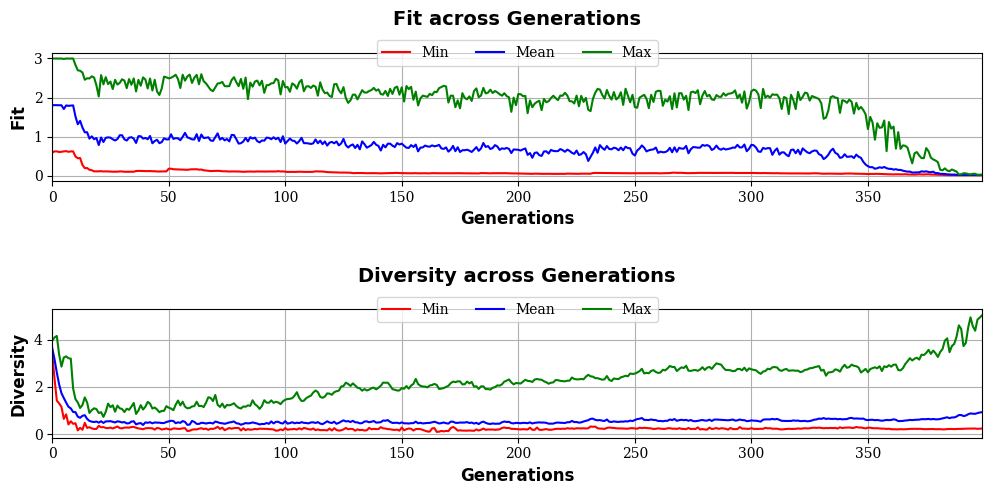

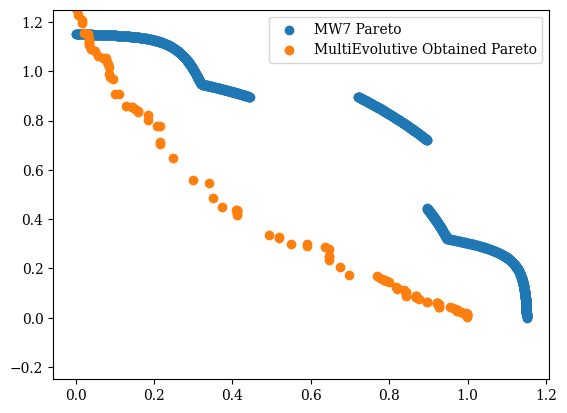

In [155]:
problem = get_problem("mw7")
evolutive = RealMultiEvolutive(
    n_individuals=200,
    value_range=[0, 1],
    maximize=[False, False],
    cromolength=15,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha"],
    front='range',
    selection_pool_size=0.8,
    average_mutation_rate=1.5,
    mutation_eps=0.05,
    elitism=True,
    alpha=0.3,
    T_selection=8
)

results = evolutive.evolve(fit=penalized_mw7, n_generations=400, trace=25, obtain_metrics=True)

evolutive.plot_evolution_metrics(results["evolution_metrics"])
plt.show()


pareto_front = problem.pareto_front()
obtained_results = np.array([mw7(p)[0] for p in results["best"]])  # Use only objectives, not constraints

# Visualization with feasibility check
feasible_mask = []
for p in results["best"]:
    _, [c1, c2] = mw7(p)
    feasible_mask.append(c1 <= 1e-6 and c2 <= 1e-6)  # Small tolerance for numerical stability
feasible_mask = np.array(feasible_mask)

if np.any(feasible_mask):
    feasible_results = obtained_results[feasible_mask]
    plot_pareto_front(pareto_front, feasible_results, 'MultiEvolutive', 'MW7')
else:
    print("No feasible solutions found in the final population")

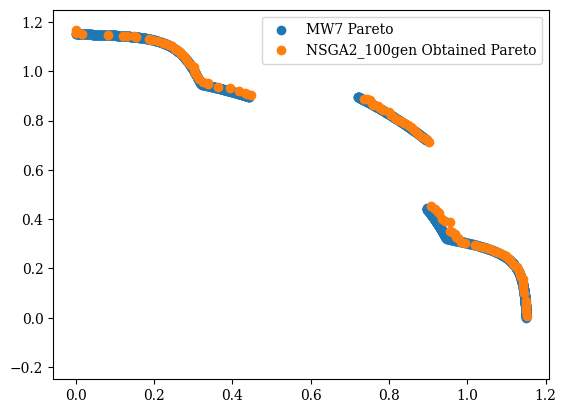

In [156]:
algorithm = NSGA2(pop_size=100)
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False)

pareto_front = problem.pareto_front()
obtained_results = res.F

p_fronts["NSGA2 MW7 "] = obtained_results

plot_pareto_front(pareto_front, obtained_results, 'NSGA2_100gen', 'MW7')

In [157]:
plot_pareto_front_3d(pareto_front, obtained_results, 'NSGA2_100gen', 'MW7')

### mw14

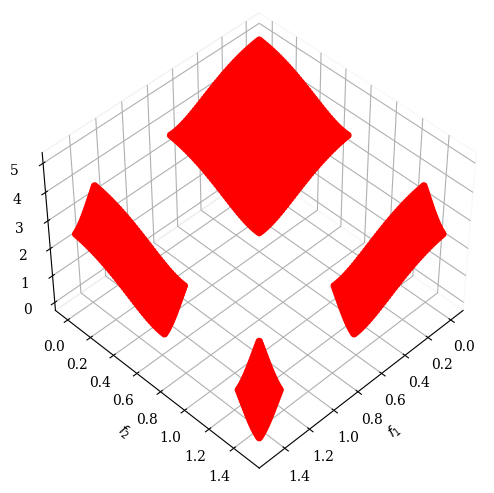

In [158]:
ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12)
problem = get_problem("mw14").pareto_front()
Scatter(angle=(45,45)).add(problem, color="red").show()

In [159]:
class TSPProblem(Problem):
    def __init__(self, n_cities, seed=50):
        # Define the number of variables (cities) and objectives (time and distance)
        super().__init__(n_var=n_cities, n_obj=2, n_constr=0, xl=0, xu=1)
        
        # Initialize the random seed for reproducibility
        if seed is not None:
            np.random.seed(seed)
        
        # Generate random distances and times between cities
        self.distances = np.random.uniform(0, 100, size=(n_cities, n_cities))
        self.distances = (self.distances + self.distances.T) / 2
        self.times = np.random.uniform(0, 300, size=(n_cities, n_cities))
        random.seed(None)
        
        # Ensure the diagonal is zero (distance/time from a city to itself is zero)
        np.fill_diagonal(self.distances, 0)
        np.fill_diagonal(self.times, 0)

    def _evaluate(self, x, out, *args, **kwargs):
        # Calculate the total distance and time for each solution in x
        distances = []
        times = []
        
        for route in x:
            perm = np.argsort(route)
            total_distance = 0
            total_time = 0
            
            for i in range(len(perm) - 1):
                total_distance += self.distances[perm[i], perm[i+1]]
                total_time += self.times[perm[i], perm[i+1]]
            
            # Add distance and time from last city back to the first city
            total_distance += self.distances[perm[-1], perm[0]]
            total_time += self.times[perm[-1], perm[0]]
            
            distances.append(total_distance)
            times.append(total_time)
        
        out["F"] = np.column_stack([distances, times])

Comprobación del funcionamiento del algoritmo NSGA2 para las funciones continuas

In [160]:
problem = get_problem("mw14", n_var = 30)
print(problem.n_var)
print(problem.n_obj)
print(problem.xl)
print(problem.xu)


30
3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5
 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5]


In [161]:
algorithm = NSGA2(pop_size=100)
res = minimize(problem,
               algorithm,
               ('n_gen', 100),
               verbose=False)

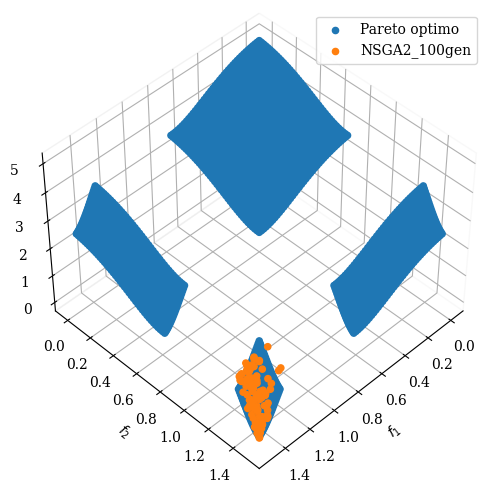

In [162]:
scatter = Scatter()
scatter.add(problem.pareto_front(), label="Pareto optimo")
scatter.add(res.F, label="NSGA2_100gen")
scatter.legend=True
scatter.show()

Comprobación del funcionamiento del algoritmo NSGA2 para el TSPMO

In [163]:
problem = TSPProblem(100)
print(np.shape(problem.distances))
print(np.shape(problem.times))

(100, 100)
(100, 100)


In [164]:
algorithm = NSGA2(pop_size=100)
res = minimize(problem,
               algorithm,
               ('n_gen', 10),
               verbose=False)
res2 = minimize(problem,
               algorithm,
               ('n_gen', 1000),
               verbose=False)

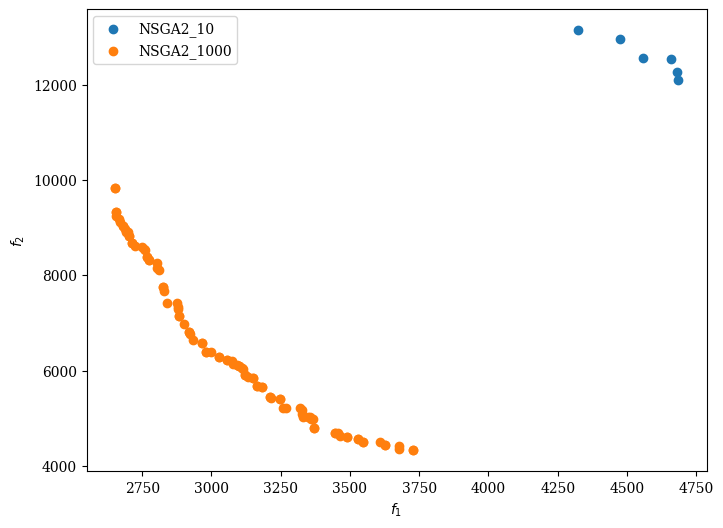

In [165]:
scatter = Scatter()
scatter.add(res.F, label="NSGA2_10")
scatter.add(res2.F, label="NSGA2_1000")
scatter.legend=True
scatter.show()


Generation      400 | Population Elite Points:       38 | Best Fit: 1.8378 | Mean Fit: 0.1957
Generation      800 | Population Elite Points:       58 | Best Fit: 1.5175 | Mean Fit: 0.1103
Generation     1200 | Population Elite Points:      122 | Best Fit: 1.2898 | Mean Fit: 0.0438
Generation     1600 | Population Elite Points:      129 | Best Fit: 1.3872 | Mean Fit: 0.0424
Generation     2000 | Population Elite Points:      127 | Best Fit: 1.3292 | Mean Fit: 0.0427


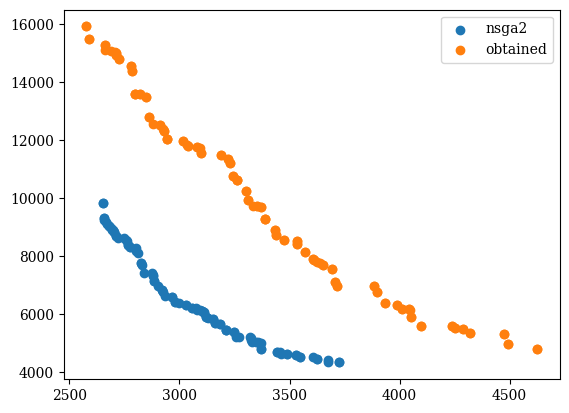

In [166]:
from src.multi_evolutive import PermutationMultiEvolutive
import matplotlib.pyplot as plt

evolutive = PermutationMultiEvolutive(
    alphabet=range(100),
    n_individuals=50,
    mutation=["to-opt", "insert-gene", "swap-gene"],
    crossover= ["uniform", "split-merge"],
    front='front',
    penalization='crowding_norm',
    selection_pool=['best', 'section'],
	T_selection=20,
	p_crossover=0.7,
	average_mutation_rate=1.25,
    maximize=[False, False],
    selection_pool_size=1.5,
	elitism=True
)
results = evolutive.evolve(fit=problem.evaluate, n_generations=2000, trace=400, obtain_metrics=True)
fig, axs = plt.subplots(1, 1)
axs.scatter(res2.F[:, 0], res2.F[:, 1], label='nsga2')
fit_scores = np.array([problem.evaluate(p) for p in results["best"]])

axs.scatter(fit_scores[:, 0], fit_scores[:, 1], label='obtained')
plt.legend()

Generation      500 | Population Elite Points:       92 | Best Fit: 1.4803 | Mean Fit: 0.0642
Generation     1000 | Population Elite Points:      153 | Best Fit: 1.2377 | Mean Fit: 0.0411
Generation     1500 | Population Elite Points:      128 | Best Fit: 1.3366 | Mean Fit: 0.0428
Generation     2000 | Population Elite Points:      143 | Best Fit: 1.2703 | Mean Fit: 0.0361


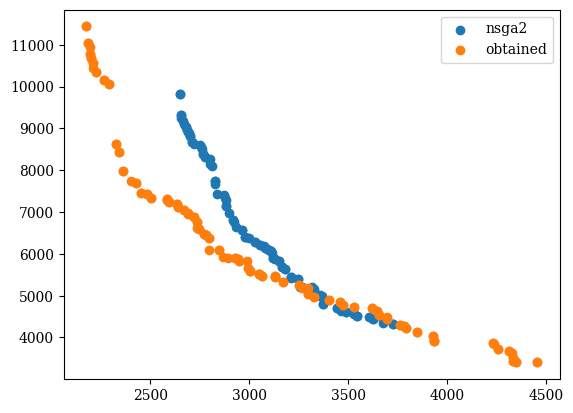

In [167]:
from src.multi_evolutive import RealMultiEvolutive
import matplotlib.pyplot as plt
import numpy as np

evolutive = RealMultiEvolutive(
    n_individuals=50,
    value_range=[0, 1],
    maximize=[False, False],
    cromolength=100,
    mutation=["random-range", "random-local"],
    crossover=["blx", "uniform", "blx-alpha", "split-merge"],
    front='front',
    penalization='crowding_norm',
    selection_pool=['best', 'section'], # , ('best', 4)],
    selection_pool_size=1.,
    average_mutation_rate=1.,
    mutation_eps=.5,
    elitism=True,
    alpha=0.6,
    T_selection=10
)
results = evolutive.evolve(fit=problem.evaluate, n_generations=2000, trace=500, obtain_metrics=True)
fig, axs = plt.subplots(1, 1)
axs.scatter(res2.F[:, 0], res2.F[:, 1], label='nsga2')
fit_scores = np.array([problem.evaluate(p) for p in results["best"]])

axs.scatter(fit_scores[:, 0], fit_scores[:, 1], label='obtained')
plt.legend()

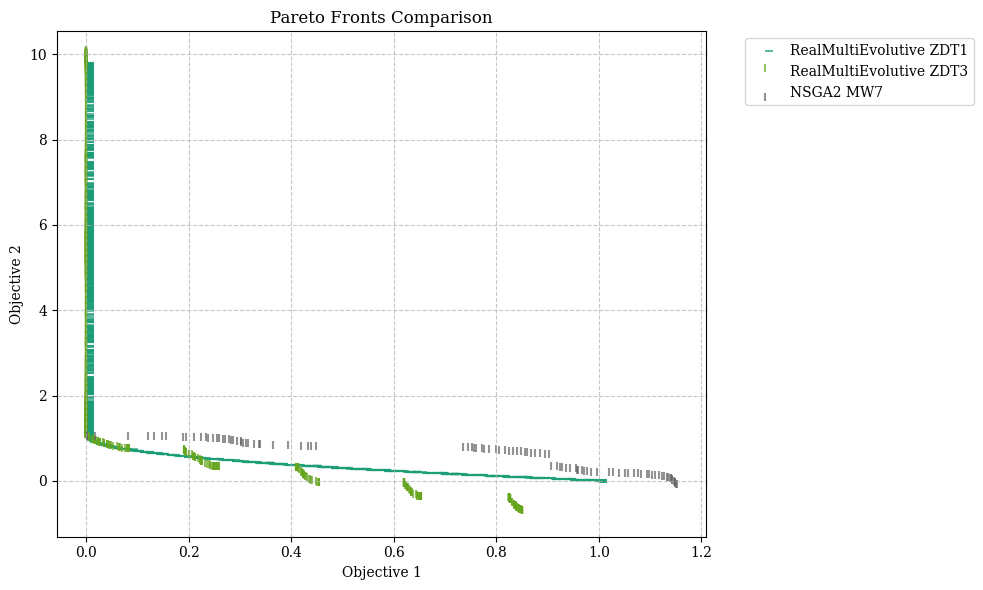

In [187]:
#example of plotting multiple pareto fronts
plot_multiple_pareto_fronts(p_fronts, title="Pareto Fronts Comparison")